In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('C:/Sonu/Dissertation_Final_Project/Deliverables/Dissertation_Report/Submission_Folder/Stress_Fault_Data_CSV/SA_Memory_Node-Frontend_Vs_Pod-Frontend.csv')
df.head(10)




Node_Mem_Frontend  Pod_Mem_Frontend
0           52215808          52215808
1           52215808          52215808
2           57577472          57577472
3           56860672          56860672
4           56860672          64004096
5           55861248          55861248
6           55861248          55861248
7           55861248          55861248
8           55861248          55861248
9           55861248          55861248

In [2]:
# Standardization of Variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=['Node_Mem_Frontend','Pod_Mem_Frontend'])

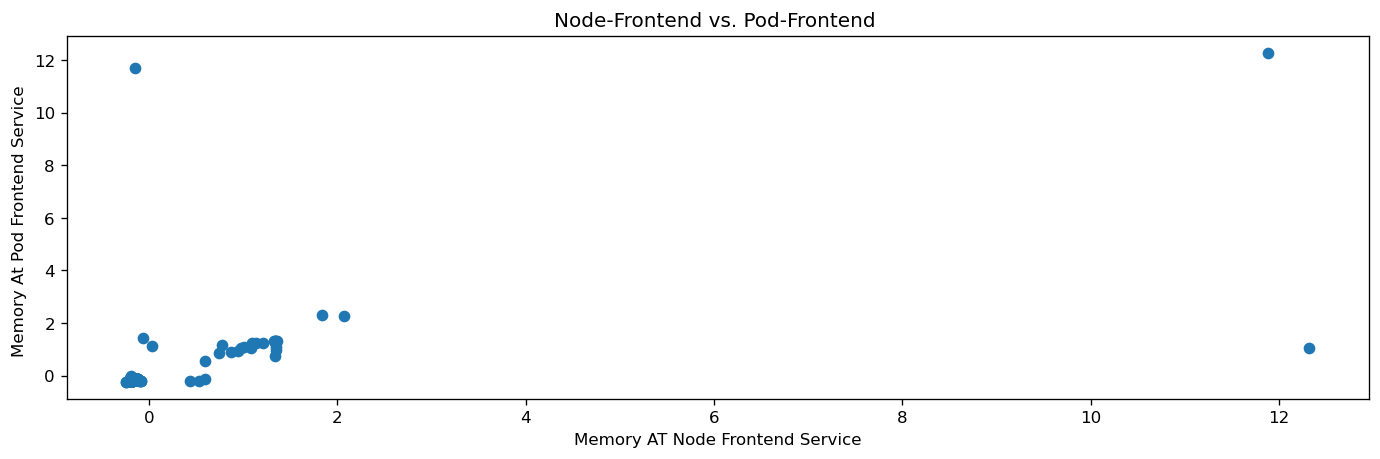

In [3]:
plt.figure(figsize=(14,4))
plt.scatter(df.Node_Mem_Frontend, df.Pod_Mem_Frontend)
plt.xlabel('Memory AT Node Frontend Service')
plt.ylabel('Memory At Pod Frontend Service ')
plt.title('Node-Frontend vs. Pod-Frontend ')
plt.show()

In [4]:
# K=3 , cause of natural sub clustering and only two features in considaration.Variable fitting to the model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(df)

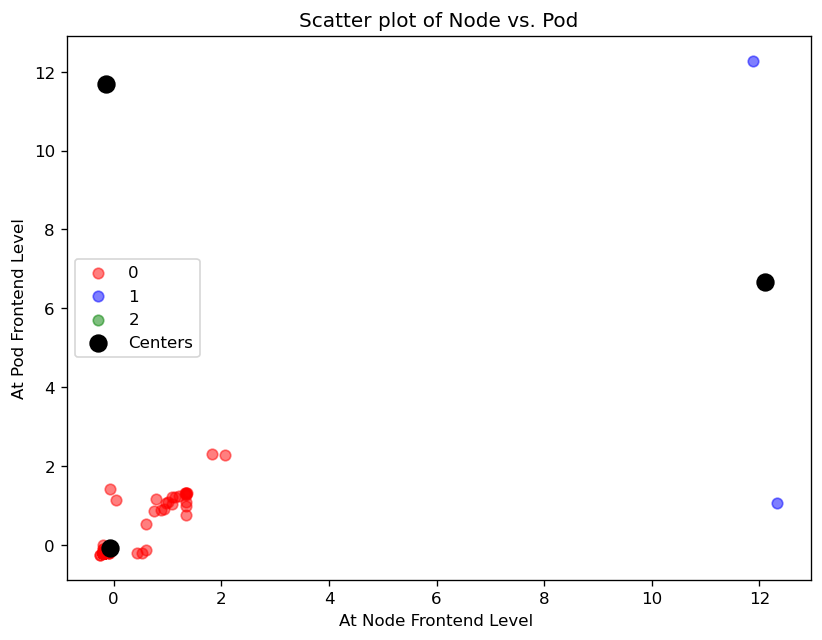

In [5]:
colors=["red","blue","green","orange"]
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].Node_Mem_Frontend, df[model.labels_==i].Pod_Mem_Frontend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Memory Data",size=20)
plt.xlabel("At Node Frontend Level ")
plt.ylabel("At Pod Frontend Level")
plt.title('Scatter plot of Node vs. Pod')
plt.legend()
plt.show()

In [6]:
def distance_from_center(Node_Mem_Frontend, Pod_Mem_Frontend, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
    :param float Node Memory Usage: the standardized Pod Memory Usage of the data point 
    :param float Node Memory Usage: the standardized Memory at Pod of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    Node_Mem_frt =  model.cluster_centers_[label,0]
    Pod_Mem_frt =  model.cluster_centers_[label,1]
    distance = np.sqrt((Node_Mem_Frontend - Node_Mem_frt) ** 2 + (Pod_Mem_Frontend - Pod_Mem_frt) ** 2)
    return np.round(distance, 2)
df['label'] = model.labels_
df['distance'] = distance_from_center(df.Node_Mem_Frontend, df.Pod_Mem_Frontend, df.label)

In [7]:
# Sorting datafram to find the top outliers
outliers_idx = list(df.sort_values('distance', ascending=False).head(10).index)
outliers = df[df.index.isin(outliers_idx)]
print(outliers)

     Node_Mem_Frontend  Pod_Mem_Frontend  label  distance
173           1.363839          1.329411      0      2.01
278           1.339528          1.305546      0      1.97
279           1.339226          1.308313      0      1.98
282          11.879253         12.275975      1      5.61
283          12.320839          1.064374      1      5.61
292           2.067719          2.282883      0      3.18
293           1.832405          2.300028      0      3.04
295           1.340786          1.279112      0      1.96
296           1.325635          1.307770      0      1.97
301           1.346222          1.313205      0      1.98


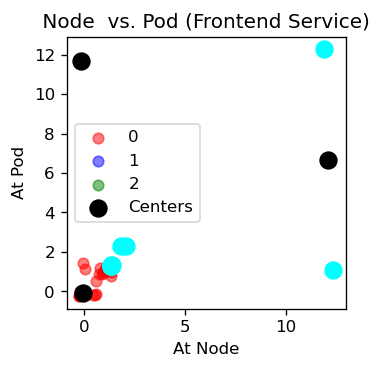

In [9]:
# figure setting
plt.figure(figsize=(3,3))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].Node_Mem_Frontend, df[model.labels_==i].Pod_Mem_Frontend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.Node_Mem_Frontend, outliers.Pod_Mem_Frontend, c='aqua', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Memory Data",size=20)
plt.xlabel("At Node")
plt.ylabel("At Pod")
plt.title(' Node  vs. Pod (Frontend Service) ')
plt.legend()
plt.show()